<h1 align="center">Experiment No. 08</h1>
<hr>

<p style="font-size:20px;"><i>$$Write\ a\ program\ to\ perform\ transformations\ of\ signals\ into\ time\ and\ frequency\ domains.$$</i></p>
<hr>

<p style="font-size:20px">Import libraries and plot setup.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin,cos
from vpython import *
import sounddevice as sd
from scipy.fftpack import fft,fft2

<IPython.core.display.Javascript object>

In [2]:
def getPlotReady(title='',xLabel='', yLabel='', figSize=None):
    fig = plt.figure()
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
        
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title,fontdict={'fontsize': 20}, pad=15.0)
    ax.set_xlabel(xLabel,fontdict={'fontsize': 16})
    ax.set_ylabel(yLabel,fontdict={'fontsize': 16})

In [3]:
def getReadySubplot(signals,title = 'Multiple Signal in subplot.', figSize=None):
    numOfPlot = len(signals)
    fig, axes = plt.subplots(numOfPlot, 1) 
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
    fig.suptitle(title, fontsize=20, y=0.93)
    for index in range(numOfPlot):
        axes[index].stem(signals[index]['x'],signals[index]['y'])
        axes[index].set_title(signals[index]['title'])
        axes[index].set_xlabel(signals[index]['xlabel'])
        axes[index].set_ylabel(signals[index]['ylabel'])

<p style="font-size:20px">Recording audio...</p>

In [8]:
fs = 16000
duration = 5
print("Start recording...")
#Check devices: 
# sd.query_devices()
# t = np.arange(0,duration,1/fs)
# rec = np.sin(2*pi*1000*t) + np.sin(2*pi*500*t)
rec = sd.rec(int(duration * fs), fs, 1, blocking = 'True')
print("Stop recording!")

Start recording...
Stop recording!


<p style="font-size:20px">Play sound and plot wave</p>

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


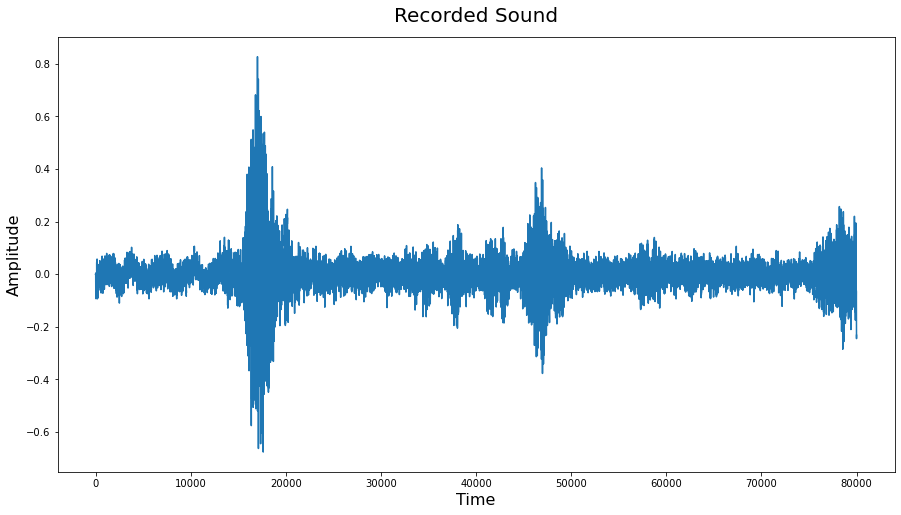

In [9]:
rec = rec.flatten()
sd.play(rec, fs)
getPlotReady(title='Recorded Sound', xLabel='Time', yLabel='Amplitude', figSize=(15,8))
plt.plot(rec)

<p style="font-size:20px">Representing the waveform as frequency spectrum</p>

In [10]:
Xf = fft(rec)
f = np.size(rec)
# print(f)
# print(np.shape(rec))
frequency = (fs/2)*np.linspace(0,1,round(f/2))
Xm = (2/f)*abs(Xf[0:np.size(frequency)])

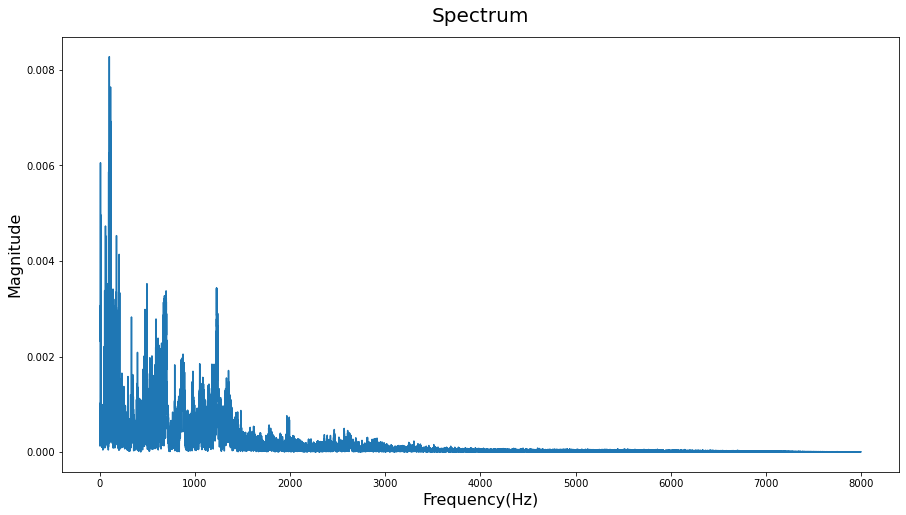

In [11]:
getPlotReady(title='Spectrum', xLabel='Frequency(Hz)', yLabel='Magnitude', figSize=(15,8))
plt.plot(frequency, Xm)
# print(np.shape(frequency))
# print(np.shape(Xm))